8.3 섹션에서 n-gram model을 소개하였는데, 이는 time step t의 x_t의 conditional probability가 오직 t-1, 즉 직전의 단어에 의해서만 결정되는 내용이었다.

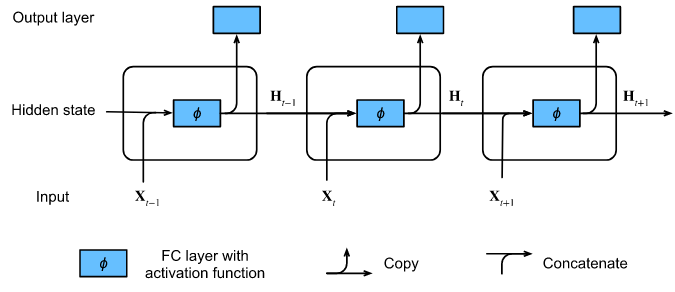


In [4]:
import torch
from d2l import torch as d2l
X, W_xh = torch.normal(0,1,(3,1)), torch.normal(0,1,(1,4))
H, W_hh = torch.normal(0,1,(3,4)), torch.normal(0,1,(4,4))
torch.matmul(X, W_xh) + torch.matmul(H, W_hh)

torch.matmul(torch.cat((X, H), 1), torch.cat((W_xh, W_hh), 0))

tensor([[-0.4576, -0.7473,  0.9446,  2.6785],
        [-1.2060, -0.1825,  0.9626,  0.0590],
        [-1.1078,  2.3752, -0.6537, -0.3435]])

# 8.4.3. RNN-based character-Level Language Models

X_tW_{xh} + H_{t-1}W_{hh}를 계산하는 것이 핵심.
이는 concatenated X_t and H_{t-1}과 concatenated W_{xh} and W_{hh}간의 곱으로 계산된다.


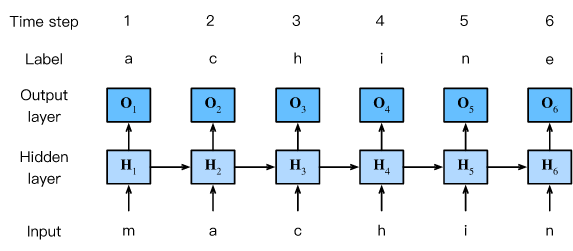

현재 토큰과 이전의 토큰들만을 고려하여 다음 토큰을 예측하는 것이 언어 모델의 핵심이다. 원래의 순서쌍을 하나의 token으로 바꿔내는 것.

위의 figure를 볼 때, O3는 결국, 'm','a','c'이라는 토큰만을 기반으로 하여 'h'을 출력하는 것이 목적이 된다.


In [7]:
import torch
from d2l import torch as d2l

X, W_xh = torch.normal(0, 1, (3, 1)), torch.normal(0, 1, (1, 4))
H, W_hh = torch.normal(0, 1, (3, 4)), torch.normal(0, 1, (4, 4))

# matmul separately.
result1 = torch.matmul(X, W_xh) + torch.matmul(H, W_hh)
print(result1)

# concatenated X and H
# concatenated Ws
result2 = torch.matmul(torch.cat((X, H), 1), torch.cat((W_xh, W_hh), 0))
print(result2)

# 각각 곱해준 다음에 더한 결과랑, concatenate한 다음에 곱해준 결과가 같다는 점.

tensor([[-0.4963,  0.0384,  0.0491, -0.1696],
        [ 2.2067,  0.1962, -0.8488,  1.3390],
        [ 3.4658,  1.5038, -2.1858,  3.9244]])
tensor([[-0.4963,  0.0384,  0.0491, -0.1696],
        [ 2.2067,  0.1962, -0.8488,  1.3390],
        [ 3.4658,  1.5038, -2.1858,  3.9244]])
